logspace:

2024-11-21 16:11:38.392284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 16:11:38.538360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-21 16:11:38.538384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-21 16:11:38.566697: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 16:11:39.204669: W tensorflow/stream_executor/platform/de

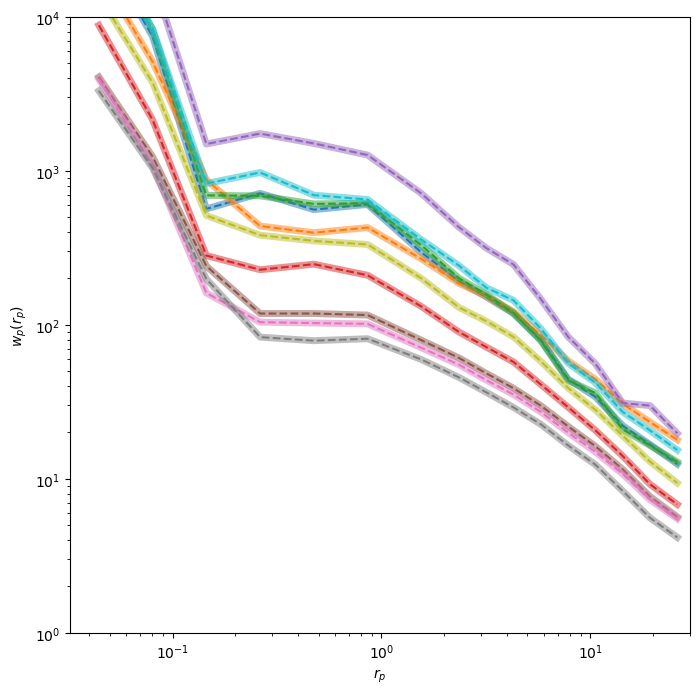

In [5]:
import importlib
import wp_emus
import plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(wp_emus)

loglog_single_fid = wp_emus.LogLogSingleFid(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/', fid='L2', logging_level='INFO')
pred, truth, rp = loglog_single_fid.train_pred_all_sims()

plot_emu = plot.PlotProjCorrEmu()

plot_emu.pred_truth(pred, truth, rp)

## LOO:

11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555
11/21/2024 04:11:53 PM Number of simualtions 555


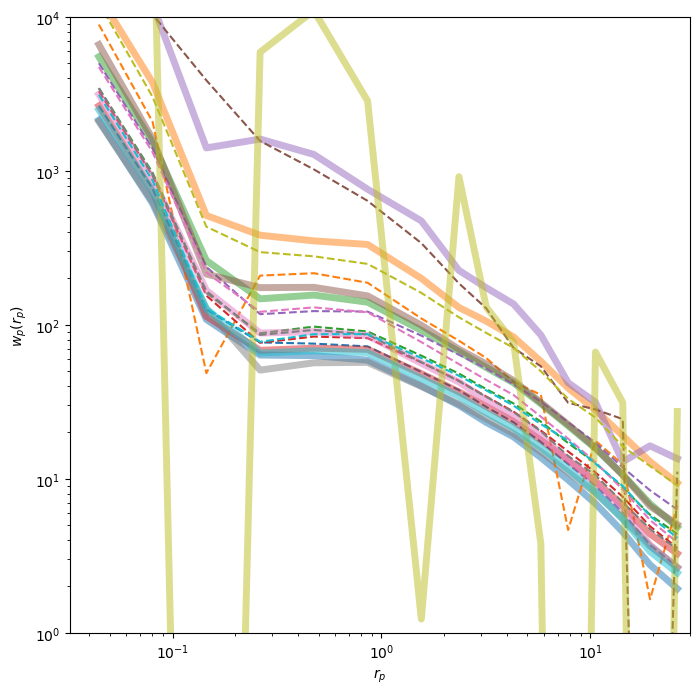

In [6]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)

plot_wp_emu = plot.PlotProjCorrEmu()
savefile= '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile)